# Imports

In [49]:
import time
import os
import psutil
from loguru import logger
import pendulum
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import seaborn as sns

import mlflow
import mlflow.sklearn

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent) if str(Path.cwd().parent).endswith("mlops-project") else str(Path.cwd()))

from src.preprocess import *
from src.explore import *
from src.train import *
from src.make_dataset import load_data
from src.utils import save_object_with_pickle
from settings.params import MODEL_PARAMS

In [2]:
# Set logging format
log_fmt = "<green>{time:YYYY-MM-DD HH:mm:ss.SSS!UTC}</green> | <level>{level: <8}</level> | <cyan>{name}</cyan>:<cyan>{function}</cyan>:<cyan>{line}</cyan> - {message}"
logger.configure(handlers=[{"sink": sys.stderr, "format": log_fmt}])

# current date
CURRENT_DATE = pendulum.now(tz="UTC")

In [3]:
# Recording the starting time, complemented with a stopping time check in the end to compute process runtime
start = time.time()

# Class representing the OS process and having memory_info() method to compute process memory usage
process = psutil.Process(os.getpid())

# Log the starting time and process details
logger.info(f"Start time: {start}")
logger.info(f"Process details: {process}")

2024-08-07 23:46:58.624 | INFO     | __main__:<module>:8 - Start time: 1723074418.624326
2024-08-07 23:46:58.626 | INFO     | __main__:<module>:9 - Process details: psutil.Process(pid=592709, name='python3.10', status='running', started='23:46:49')


# Data

In [47]:
project_dir = str(Path.cwd().parent) if str(Path.cwd().parent).endswith("mlops-project") else str(Path.cwd())
project_dir

'/home/ass-niang/Desktop/mlops-project'

## Load data

In [4]:
data = load_data(project_dir + "/data/ecommerceDataset.csv")
data

2024-08-07 23:46:58.645 | INFO     | src.make_dataset:load_data:23 - Dataset to load: /home/ass-niang/Desktop/mlops-project/data/ecommerceDataset.csv


2024-08-07 23:46:59.093 | INFO     | src.make_dataset:load_data:32 - Memory usage: 0.77 MB
2024-08-07 23:46:59.094 | INFO     | src.make_dataset:load_data:34 - Dataset shape: (50425, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,Household
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",Household
2,SAF 'UV Textured Modern Art Print Framed' Pain...,Household
3,"SAF Flower Print Framed Painting (Synthetic, 1...",Household
4,Incredible Gifts India Wooden Happy Birthday U...,Household
...,...,...
50420,Strontium MicroSD Class 10 8GB Memory Card (Bl...,Electronics
50421,CrossBeats Wave Waterproof Bluetooth Wireless ...,Electronics
50422,Karbonn Titanium Wind W4 (White) Karbonn Titan...,Electronics
50423,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",Electronics


## Missing & Duplicate observations values

In [5]:
data = drop_missing_and_duplicates(data)
data

2024-08-07 23:46:59.167 | INFO     | src.preprocess:drop_missing_and_duplicates:35 - Number of observations with missing values: 1
2024-08-07 23:46:59.168 | INFO     | src.preprocess:drop_missing_and_duplicates:38 - Number of duplicate observations: 22622
2024-08-07 23:46:59.169 | INFO     | src.preprocess:drop_missing_and_duplicates:41 - Dropping observations with missing values
2024-08-07 23:46:59.187 | INFO     | src.preprocess:drop_missing_and_duplicates:45 - Dropping duplicate observations
2024-08-07 23:46:59.272 | INFO     | src.preprocess:drop_missing_and_duplicates:49 - Resetting index
2024-08-07 23:46:59.273 | INFO     | src.preprocess:drop_missing_and_duplicates:53 - Encoding of labels
2024-08-07 23:46:59.295 | INFO     | src.preprocess:drop_missing_and_duplicates:63 - Dataset shape: (27802, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",1
4,Incredible Gifts India Wooden Happy Birthday U...,1
...,...,...
27797,Micromax Bharat 5 Plus Zero impact on visual d...,0
27798,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0
27799,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0
27800,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0


# Exploratory Data Analysis

- [**Class Frequencies**](#Class-Frequencies)
- [**Number of Characters**](#Number-of-Characters)
- [**Number of Words**](#Number-of-Words)
- [**Average Word-length**](#Average-Word-length)

In [6]:
data_e, data_h, data_b, data_c = split_by_label(data)
save_path = project_dir + "/reports"

## Class Frequencies

In [7]:
visualize_and_save_class_frequencies(
    data_e, data_h, data_b, data_c, save_path=save_path
)

2024-08-07 23:46:59.374 | INFO     | src.explore:visualize_and_save_class_frequencies:65 - Saving figure in /home/ass-niang/Desktop/mlops-project/reports/class_frequencies_pie_chart.png


## Number of Characters

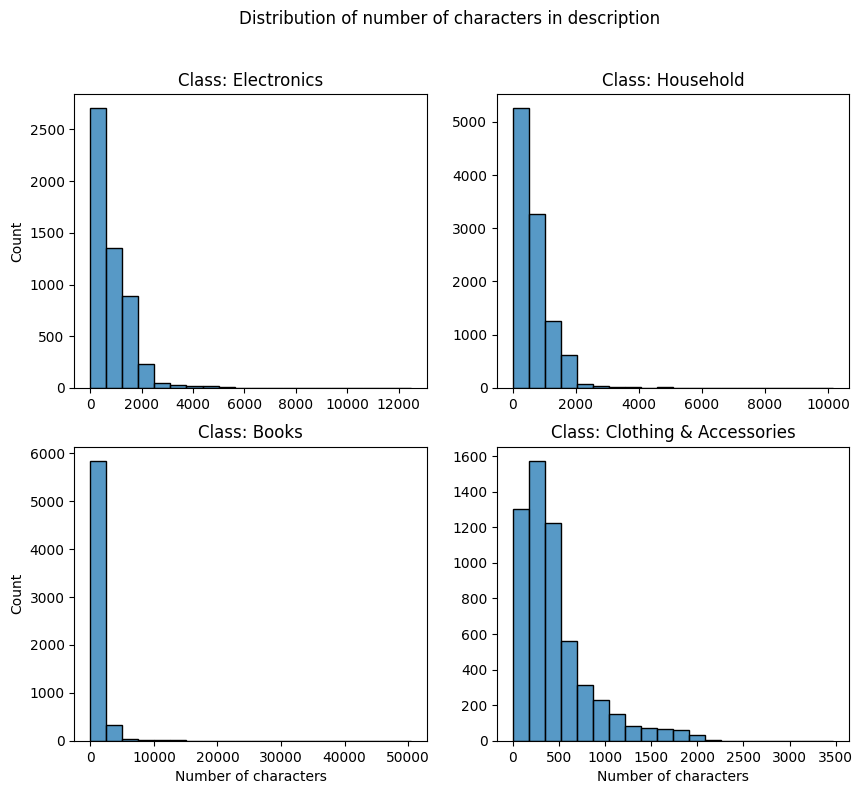

In [8]:
visualize_and_save_character_distribution(
    data_e, data_h, data_b, data_c, save_path=save_path
)

## Number of Words

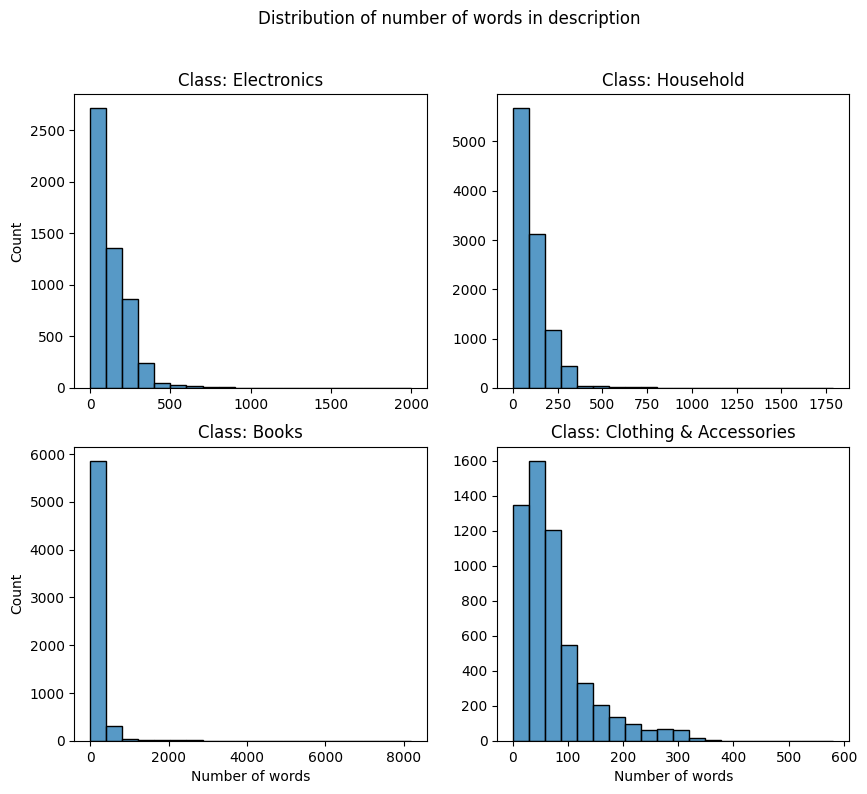

In [9]:
visualize_and_save_word_distribution(
    data_e, data_h, data_b, data_c, save_path=save_path
)

## Average Word-length

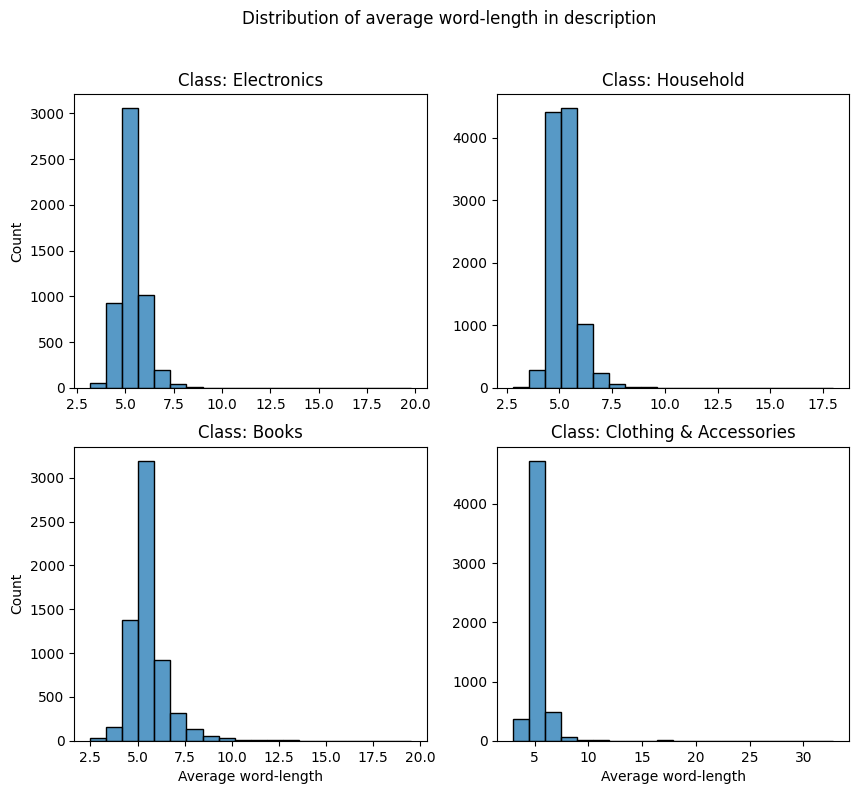

In [10]:
visualize_and_save_avg_word_length_distribution(
    data_e, data_h, data_b, data_c, save_path=save_path
)

# Train-Validation-Test Split

In [11]:
data_train, data_val, data_test = split_data(
    data, target_column="label", test_size=0.2, val_size=0.5, random_state=40
)

In [12]:
plot_data_split_sizes(data_train, data_val, data_test, save_path=save_path)

# Text Normalization

- [**Convertion to Lowercase**](#Convertion-to-Lowercase)
- [**Removal of Whitespaces**](#Removal-of-Whitespaces)
- [**Removal of Punctuations**](#Removal-of-Punctuations)
- [**Removal of Unicode Characters**](#Removal-of-Unicode-Characters)
- [**Substitution of Acronyms**](#Substitution-of-Acronyms)
- [**Substitution of Contractions**](#Substitution-of-Contractions)
- [**Removal of Stop Words**](#Removal-of-Stop-Words)
- [**Spelling Correction**](#Spelling-Correction)
- [**Lemmatization**](#Lemmatization)
- [**Discardment of Non-alphabetic Words**](#Discardment-of-Non-alphabetic-Words)
- [**Retainment of Relevant Parts of Speech**](#Retainment-of-Relevant-Parts-of-Speech)
- [**Integration of the Processes**](#Integration-of-the-Processes)
- [**Implementation on Product Description**](#Implementation-on-Product-Description)

## Convertion to Lowercase

In [13]:
# Log input text
text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
logger.info(f"Input: {text}")

# Convert text to lowercase and log output
output = convert_to_lowercase(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.320 | INFO     | __main__:<module>:3 - Input: This is a FUNCTION that CoNvErTs a Text to lowercase
2024-08-07 23:47:04.322 | INFO     | __main__:<module>:7 - Output: this is a function that converts a text to lowercase


## Removal of Whitespaces

In [14]:
# Removing whitespaces
text = " \t This is a string \t "

# Log input text
logger.info(f"Input: {text}")

# Remove whitespace and log output
output = remove_whitespace(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.338 | INFO     | __main__:<module>:5 - Input:  	 This is a string 	 
2024-08-07 23:47:04.340 | INFO     | __main__:<module>:9 - Output: This is a string


## Removal of Punctuations

In [15]:
# Removing punctuations
text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"

# Log input text
logger.info(f"Input: {text}")

# Remove punctuation and log output
output = remove_punctuation(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.356 | INFO     | __main__:<module>:5 - Input: Here's [an] example? {of} &a string. with.? punctuations!!!!
2024-08-07 23:47:04.357 | INFO     | __main__:<module>:9 - Output: Here's an example of a string with punctuations


## Removal of Unicode Characters

In [16]:
text = '<a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>'

# Log input text
logger.info(f"Input: {text}")

# Remove punctuation and log output
output = remove_punctuation(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.378 | INFO     | __main__:<module>:4 - Input: <a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>
2024-08-07 23:47:04.380 | INFO     | __main__:<module>:8 - Output: a href  httpswwwkagglecomdatasetssaurabhshahaneecommercetextclassification Ecommerce Text Classification a


In [17]:
# Removing emojis
text = "This is a sample text with emojis 😊🚀 and symbols like ❤️."

# Log input text
logger.info(f"Input: {text}")

# Remove emojis and log output
output = remove_emoji(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.396 | INFO     | __main__:<module>:5 - Input: This is a sample text with emojis 😊🚀 and symbols like ❤️.
2024-08-07 23:47:04.403 | INFO     | __main__:<module>:9 - Output: This is a sample text with emojis  and symbols like .


In [18]:
# Removing other unicode characters
text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"

# Log input text
logger.info(f"Input: {text}")

# Remove HTTP URLs and log output
output = remove_http(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.421 | INFO     | __main__:<module>:5 - Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
2024-08-07 23:47:04.423 | INFO     | __main__:<module>:9 - Output: It's a function that removes links starting with http: or https such as 


## Substitution of Acronyms

In [19]:
# Convert acronyms in a text
text = "btw you've to fill in the details including dob"

# Log input text
logger.info(f"Input: {text}")

# Convert acronyms and log output
output = convert_acronyms(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.436 | INFO     | __main__:<module>:5 - Input: btw you've to fill in the details including dob
2024-08-07 23:47:04.437 | INFO     | __main__:<module>:9 - Output: by the way you've to fill in the details including date of birth


## Substitution of Contractions

In [20]:
# Convert contractions in a text
text = "he's doin' fine"

# Log input text
logger.info(f"Input: {text}")

# Convert contractions and log output
output = convert_contractions(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.459 | INFO     | __main__:<module>:5 - Input: he's doin' fine
2024-08-07 23:47:04.461 | INFO     | __main__:<module>:9 - Output: he is doing fine


## Removal of Stop Words

In [21]:
# Remove stopwords
text = "This is a function that removes stopwords in a given text"

# Log input text
logger.info(f"Input: {text}")

# Remove stopwords and log output
output = remove_stopwords(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.476 | INFO     | __main__:<module>:5 - Input: This is a function that removes stopwords in a given text
2024-08-07 23:47:04.478 | INFO     | __main__:<module>:9 - Output: This function removes stopwords given text


## Spelling Correction

In [22]:
# pyspellchecker
text = "I'm goinng therre"

# Log input text
logger.info(f"Input: {text}")

# Correct text and log output
output = pyspellchecker(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.501 | INFO     | __main__:<module>:5 - Input: I'm goinng therre
2024-08-07 23:47:04.504 | INFO     | __main__:<module>:9 - Output: I'm going there


## Lemmatization

[**Lemmatization**](https://en.wikipedia.org/wiki/Lemmatisation) offers a more sophisticated approach by utilizing a corpus to match root forms of the words. Unlike stemming, it uses the context in which a word is being used.

In [23]:
# Lemmatization
text = "Introducing lemmatization as an improvement over stemming"

# Log input text
logger.info(f"Input: {text}")

# Apply lemmatization and log output
output = text_lemmatizer(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.518 | INFO     | __main__:<module>:5 - Input: Introducing lemmatization as an improvement over stemming
2024-08-07 23:47:04.526 | INFO     | __main__:<module>:9 - Output: introduce lemmatization as an improvement over stem


## Discardment of Non-alphabetic Words

The non-alphabetic words are not numerous and create unnecessary diversions in the context of classifying tweets into non-disaster and disaster categories. Hence we discard these words.

In [24]:
# Discardment of non-alphabetic words
text = "It is an ocean of thousands and 1000s of crowd"

# Log input text
logger.info(f"Input: {text}")

# Discard non-alphabetic and log output
output = discard_non_alpha(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.540 | INFO     | __main__:<module>:5 - Input: It is an ocean of thousands and 1000s of crowd
2024-08-07 23:47:04.542 | INFO     | __main__:<module>:9 - Output: It is an ocean of thousands and of crowd


## Retainment of Relevant Parts of Speech

In [25]:
# https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk

In [26]:
text = "He arrived at seven o'clock on Wednesday evening"

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Tag tokens with POS tags
tokens_tagged = nltk.pos_tag(tokens)

# Log input text
logger.info(f"Input: {text}")

# Log tokens
logger.info(f"Tokens: {tokens}")

# Log tagged tokens
logger.info(f"Tagged Tokens: {tokens_tagged}")

# Process text with keep_pos and log output
output = keep_pos(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.801 | INFO     | __main__:<module>:10 - Input: He arrived at seven o'clock on Wednesday evening
2024-08-07 23:47:04.802 | INFO     | __main__:<module>:13 - Tokens: ['He', 'arrived', 'at', 'seven', "o'clock", 'on', 'Wednesday', 'evening']
2024-08-07 23:47:04.803 | INFO     | __main__:<module>:16 - Tagged Tokens: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
2024-08-07 23:47:04.805 | INFO     | __main__:<module>:20 - Output: He arrived o'clock Wednesday evening


## Integration of the Processes

In [27]:
text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"

# Log input text
logger.info(f"Input: {text}")

# Normalize text and log output
output = text_normalizer(text)
logger.info(f"Output: {output}")

2024-08-07 23:47:04.813 | INFO     | __main__:<module>:4 - Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization
2024-08-07 23:47:04.823 | INFO     | __main__:<module>:8 - Output: combine function function apply product description


## Implementation on Product Description

In [28]:
%%time
data_train_norm, data_val_norm, data_test_norm = normalize_split_data(
    data_train, data_val, data_test, text_normalizer
)

CPU times: user 4min 32s, sys: 887 ms, total: 4min 33s
Wall time: 4min 33s


In [29]:
data_train_norm

,normalized description,label
15525,approach acupuncture author author graduate al...,2
1536,nice leatherette office arm chair chair seat h...,1
21984,ekan fedora hat girl boy fedora hat hat man fe...,3
25056,concert showlightning controller lighting cont...,0
25213,marantz fully beltdrive premounted cartridge b...,0
...,...,...
23992,apple tablet inch gb wifi gold matter task pro...,0
27640,skin sticker super hero collection fit dell hp...,0
14501,challenger sale take control customer conversa...,2
14555,mathematics work book opinion class,2


# TF-IDF Model

- [**Text Vectorization**](#Text-Vectorization)
- [**TF-IDF Baseline Modeling**](#TF-IDF-Baseline-Modeling)
- [**TF-IDF Hyperparameter Tuning**](#TF-IDF-Hyperparameter-Tuning)

## Text Vectorization

In order to perform machine learning on text data, we must transform the documents into vector representations. In [**natural language processing**](https://en.wikipedia.org/wiki/Natural_language_processing), **text vectorization** is the process of converting words, sentences, or even larger units of text data to numerical vectors.

In [30]:
# Features and labels
X_train_norm, y_train = (
    data_train_norm["normalized description"].tolist(),
    data_train_norm["label"].tolist(),
)
X_val_norm, y_val = (
    data_val_norm["normalized description"].tolist(),
    data_val_norm["label"].tolist(),
)
X_test_norm, y_test = (
    data_test_norm["normalized description"].tolist(),
    data_test_norm["label"].tolist(),
)

In [31]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range=(1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_val_tfidf = TfidfVec.transform(X_val_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

## TF-IDF Baseline Modeling

In [32]:
# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(n_neighbors=149, n_jobs=-1),
    DecisionTreeClassifier(),
    svm.SVC(kernel="linear"),
    RandomForestClassifier(n_estimators=100),
    SGDClassifier(loss="hinge"),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
]

## MLFLOW

In [33]:
# Set the MLflow tracking URI to your MLflow server
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Create an experiment if not exists
exp_name = "e-commerce-text-classification"
experiment = mlflow.get_experiment_by_name(exp_name)
if not experiment:
    experiment_id = mlflow.create_experiment(exp_name)
else:
    experiment_id = experiment.experiment_id

In [34]:
# Summary of baseline models
config = {
    "x_train": X_train_tfidf,
    "y_train": y_train,
    "x_val": X_val_tfidf,
    "y_val": y_val,
    "names": names,
    "models": models,
    "experiment_id": experiment_id,
    "current_date": CURRENT_DATE
}

results = score(config)
results

2024-08-07 23:51:50.883 | INFO     | src.train:score:157 - Trained Logistic Regression model
2024-08-07 23:51:50.915 | INFO     | src.train:score:165 - Logistic Regression - Training accuracy: 0.9669978867856661
2024-08-07 23:51:50.916 | INFO     | src.train:score:166 - Logistic Regression - Validation accuracy: 0.943884892086331
2024-08-07 23:51:54.598 | INFO     | src.train:score:157 - Trained KNN Classifier model
2024-08-07 23:52:15.082 | INFO     | src.train:score:165 - KNN Classifier - Training accuracy: 0.9161008947439414
2024-08-07 23:52:15.083 | INFO     | src.train:score:166 - KNN Classifier - Validation accuracy: 0.9050359712230216
2024-08-07 23:52:29.473 | INFO     | src.train:score:157 - Trained Decision Tree model
2024-08-07 23:52:29.531 | INFO     | src.train:score:165 - Decision Tree - Training accuracy: 0.999955037992896
2024-08-07 23:52:29.532 | INFO     | src.train:score:166 - Decision Tree - Validation accuracy: 0.862589928057554
2024-08-07 23:53:23.719 | INFO     | 

,Classifier,Training accuracy,Validation accuracy
6,Ridge Classifier,0.983634,0.953957
3,Linear SVM,0.978193,0.952518
5,SGD Classifier,0.967762,0.951799
0,Logistic Regression,0.966998,0.943885
4,Random Forest,0.999955,0.931655
7,XGBoost,0.962592,0.922662
1,KNN Classifier,0.916101,0.905036
2,Decision Tree,0.999955,0.862590
8,AdaBoost,0.809541,0.786331


## Hyperparameter Tuning

We perform **hyperparameter tuning** on the best performing baseline model.

In [35]:
ridge_config = {
    "x_train_tfidf": X_train_tfidf,
    "y_train": y_train,
    "x_val_tfidf": X_val_tfidf,
    "y_val": y_val,
    "experiment_id": experiment_id,
    "current_date": CURRENT_DATE
}

best_model_tfidf, best_params_ridge, best_score_ridge = tune_ridge_classifier(ridge_config)

2024-08-07 23:56:51.223 | INFO     | src.train:tune_ridge_classifier:208 - Gridpoint #1: {'alpha': 0.1, 'solver': 'auto'}
2024-08-07 23:56:58.017 | INFO     | src.train:tune_ridge_classifier:225 - Training accuracy: 0.9974371655950721, Validation accuracy: 0.9510791366906475, Runtime: 0m6s
2024-08-07 23:57:00.254 | INFO     | src.train:tune_ridge_classifier:208 - Gridpoint #2: {'alpha': 0.5, 'solver': 'auto'}
2024-08-07 23:57:02.461 | INFO     | src.train:tune_ridge_classifier:225 - Training accuracy: 0.9895688143518727, Validation accuracy: 0.9532374100719424, Runtime: 0m2s
2024-08-07 23:57:04.666 | INFO     | src.train:tune_ridge_classifier:208 - Gridpoint #3: {'alpha': 0.7, 'solver': 'auto'}
2024-08-07 23:57:06.775 | INFO     | src.train:tune_ridge_classifier:225 - Training accuracy: 0.9870959039611529, Validation accuracy: 0.9532374100719424, Runtime: 0m2s
2024-08-07 23:57:09.139 | INFO     | src.train:tune_ridge_classifier:208 - Gridpoint #4: {'alpha': 0.9, 'solver': 'auto'}
2024-

# Final Prediction and Evaluation

We employ the model with the highest validation accuracy to predict the labels of the test observations and report the resulting test accuracy and confusion matrix.

In [38]:
best_model, X_train_vec, X_test_vec = best_model_tfidf, X_train_tfidf, X_test_tfidf

2024-08-07 23:57:35.187 | INFO     | src.train:evaluate_model:316 - Starting prediction and evaluation on the test set


2024-08-07 23:57:37.761 | INFO     | src.train:evaluate_model:320 - Test accuracy: 0.948220064724919


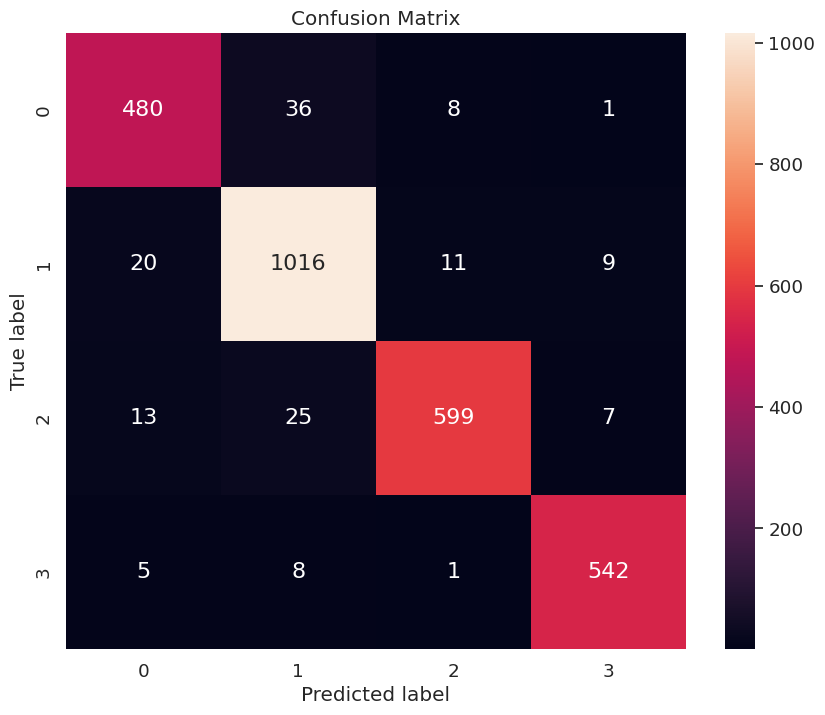

In [39]:
eval_config = {
    "best_model": best_model,
    "x_train_vec": X_train_vec,
    "y_train": y_train,
    "x_test_vec": X_test_vec,
    "y_test": y_test,
    "experiment_id": experiment_id,
    "current_date": CURRENT_DATE,
    "save_path": save_path
}


evaluate_model(eval_config)

In [40]:
# # Prediction and evaluation on the test set
# logger.info("Starting prediction and evaluation on the test set")
# best_model.fit(X_train_vec, y_train)
# y_test_pred = best_model.predict(X_test_vec)
# score_test = accuracy_score(y_test, y_test_pred)
# logger.info(f"Test accuracy: {score_test}")

# # Log the test accuracy to mlflow
# with mlflow.start_run(run_name=f"{CURRENT_DATE.strftime('%Y%m%d_%H%m%S')}-ecommerce-Best_RidgeClassifier_Model_Test_Evaluation",
#                             experiment_id=experiment_id,
#                             tags={"version": "v1", "priority": "P1"},
#                             description="ecommerce text classification. Best RidgeClassifier model test evaluation",
#                             ) as mlf_run:
#     mlflow.log_metric("test_accuracy", score_test)
#     mlflow.sklearn.log_model(best_model_tfidf, "best_model")

# # Plot the confusion matrix and save it as an image
# conf_matrix_path = os.path.join("../reports", 'confusion_matrix.png')
# conf_mat(y_test, y_test_pred, figsize=(10, 8), font_scale=1.2, annot_kws_size=16, save_path=conf_matrix_path)

In [41]:
# Record the stopping time
stop = time.time()

# Calculate runtime and memory usage
runtime = "{:.2f} seconds".format(stop - start)
memory_usage = "{:.2f} MB".format(process.memory_info().rss / (1024 * 1024))

# Log runtime
logger.info(f"Process runtime: {runtime}")

# Log memory usage
logger.info(f"Process memory usage: {memory_usage}")

2024-08-07 23:57:40.317 | INFO     | __main__:<module>:9 - Process runtime: 641.69 seconds
2024-08-07 23:57:40.318 | INFO     | __main__:<module>:12 - Process memory usage: 1307.07 MB


# Export the model

In [45]:
# Save the classifier
classifier_path = project_dir + "/models/classifier.pkl"
save_object_with_pickle(object_to_save=best_model_tfidf, object_path=classifier_path)

# Save the vectorizer
vectorizer_path = project_dir + "/models/tfidf_vectorizer.pkl"
save_object_with_pickle(object_to_save=TfidfVec, object_path=vectorizer_path)

2024-08-08 00:59:46.292 | INFO     | src.utils:save_object_with_pickle:21 - Starting object record in /home/ass-niang/Desktop/mlops-project/models/classifier.pkl
2024-08-08 00:59:46.297 | INFO     | src.utils:save_object_with_pickle:29 - Done object record successfully
2024-08-08 00:59:46.298 | INFO     | src.utils:save_object_with_pickle:21 - Starting object record in /home/ass-niang/Desktop/mlops-project/models/tfidf_vectorizer.pkl
2024-08-08 00:59:46.316 | INFO     | src.utils:save_object_with_pickle:29 - Done object record successfully


In [43]:
import types


def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

In [44]:
for i in list(imports()):
    print(i)

builtins
builtins
time
os
psutil
pendulum
pandas
numpy
plotly.graph_objects
matplotlib.pyplot
seaborn
mlflow
sklearn.metrics
sklearn.svm
sys
re
string
nltk
spacy
types
